In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from Line import Line
from Nozzle import Nozzle
from Point import Point

interactive(children=(FloatSlider(value=0.0, description='nozzle_x', max=5.0, min=-5.0), IntSlider(value=20, d…

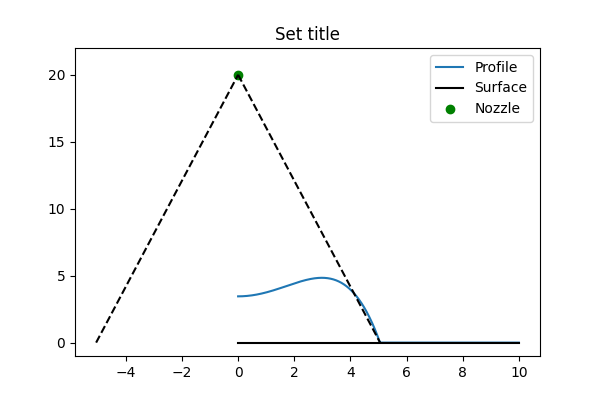

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True)

start_point = Point(0, 0)
end_point = Point(10, 0)
line = Line(start_point, end_point)


@widgets.interact(nozzle_x=(-5, 5, 0.1), nozzle_y=(5, 30, 1), title="Set title")
def update(nozzle_x=0, nozzle_y=20, title="default_title"):
    
    nozzle_position = Point(nozzle_x, nozzle_y)
    nozzle = Nozzle("nozzle1", nozzle_position)

    x_values = line.get_x_values()
    h_values = nozzle.get_profile_for_line(line)

    [l.remove() for l in ax.lines]
    ax.clear()
    ax.set_ylim([start_point.x - 1, nozzle_y + 2])
    ax.plot(x_values, h_values, label="Profile")
    ax.plot(line.get_x_values(), line.get_y_values(), 'k', label="Surface")
    plt.plot(nozzle_x, nozzle_y, "og", label="Nozzle")
    plt.title(title)
    
    left_outer_line = nozzle.get_left_outer_line(line)
    right_outer_line = nozzle.get_right_outer_line(line)

    plt.plot(left_outer_line.get_x_values(), left_outer_line.get_y_values(), "--k")
    plt.plot(right_outer_line.get_x_values(), right_outer_line.get_y_values(), "--k")
    
    ax.legend()